Entrega: La entrega de este examen se realizará a traves del git hub.

El nombre del notebook deberá ser:

Apellido_Nombre_UltimosCuatroDigitosDelDocumento.ipynb

# Paracaidista en un atmosfera no uniforme.

En una atmósfera isotérmica, la variación de la presión en función de la altitud está dada por la ley de Laplace.

\begin{equation}
P=P_0 e^{-\frac{Mgy}{kT}}
\end{equation}


- $P_0=1atm$ es la presión de la atmósfera a nivel del mar
- M es el peso molecular del aire $28.8 g/mol=0.0288 kg/mol$
- g es la aceleración de la gravedad
- $k=1.3805·10^{-23}$ J/K es la constante de Boltzmann
- $T$ es la temperatura de la atmósfera en kelvin
- $NA=6.0225\times 10^23$ es el número de Avogadro, número de moléculas que caben en un mol.

Suponiendo que el aire se comporta como un gas ideal, su densidad varía con la altura de la misma forma que la presión, $\rho=\rho_0 exp(-y/\lambda)$. La densidad del aire al nivel del mar es $\rho_0=1.29 kg/m^3$ y la constante $\lambda=7482.2 m$


Las fuerzas que actuan sobre el paracaidista son:  El peso y la fuerza de fricción $f=\frac{1}{2}\rho A \delta v^2$, donde $\rho$ es la densidad que depende de la altura, A es el area de seccion trasnversal expuesta al aire  y $\delta $ es coeficiente de rozamiento. La Ecuacion diferencial de movimiento viene dada por:

\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - mg + \frac{A\delta}{2m} \rho v^2 
\end{equation}


\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - mg + k_0v^2 exp(-y/\lambda)
\end{equation}

donde $k_0=\frac{\rho_0A\delta}{2}$, siendo $\rho_0$ la densidad al nivel del mar.

Para la situación descrita, su tarea será elaborar un notebook de jupyter para resolver lo siguente:

1.  Elaborar una gráfica de la densidad como función de la altura.
2. Diseñar un programa que resuelva  la ecuación diferencial que describe el movimiento del paracaidista, para los siguientes parámetros: 

- $m=60kg$, $A=0.3m^2$, $h=30km$.
- $m=60kg$, $A=0.3m^2$, $h=40km$.
- $m=60kg$, $A=0.3m^2$, $h=50km$.
- $m=60kg$, $A=0.3m^2$, $h=60km$.
- $m=60kg$, $A=0.3m^2$, $h=70km$.

3. Con la solucion de la ecuacion diferencial, elaborar una gráfica de. 
- la posición como función del tiempo.
- La velocidad como función del tiempo.
- La velocidad como función de la posición 

4. Determine numéricamente y analiticamente el valor de la velocidad maxima para las diferentes altura Compara su resultado con:

http://www.sc.ehu.es/sbweb/fisica3/fluidos/paracaidas/paracaidas_1.html



5. Realice un grafico de la velocidad maxima como función de la altura de caida.



Reto:

El modelo puede ser mejorado si se tiene presente que la aceleración de la gravedad varia según la altura.

\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - \frac{GM}{(R+y)^2} + \frac{A\delta}{2m} \rho v^2 
\end{equation}

donde $G=6.67\times 10^{-11} \mathrm{Nm^2/kg}$, $M=5.98\times 10 ^{24} \mathrm{kg}$ y el radio de la Tierra es de $R=6.371\mathrm{km}$


Solucione la ecuación diferencial para este caso.





# Solución

# Gráfica de la densidad en función de la altura)

La función que nos describe la densidad en función de la altura está dada por la expresión

$$\rho=\rho_0e^{-\frac{y}{\lambda}}$$
donde $P_0=1.29kg/m^3$ y $\lambda=7482.2m$.

Con estos datos podemos crear una función que nos entregue la densidad del aire según la altura

In [37]:
import numpy as np
import scipy.integrate as spi
import sympy as sp
import matplotlib.pyplot as plt

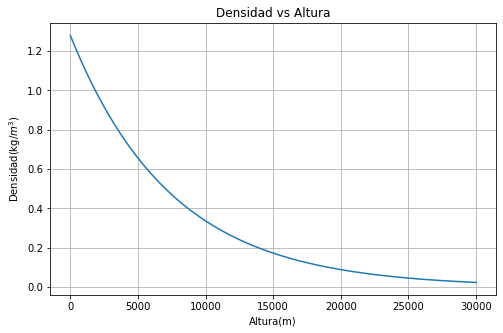

In [38]:
P0=1.28 #kg/m^3
λ=7482.2 #m
##Definimos la función
ρ=lambda y: P0*np.exp(-y/λ)
#definimos un arreglo con alturas en metros
y=np.arange(0,3*10e3,0.1)
plt.figure(figsize=(8,5))
plt.plot(y,ρ(y))
plt.ylabel("Densidad(kg/$m^3$)")
plt.xlabel("Altura(m)")
plt.title("Densidad vs Altura")
plt.grid()
plt.show()

## Crear un programa que solucione la ecuación diferencial para parámetros variables)

Nuestra ecuación diferencial está descrita como
$$\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - g + \frac{k_0}{m}v^2 exp(-y/\lambda)$$
$$\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - g + \frac{k_0}{m}\left(\frac{dy}{dt}\right)^2 exp(-y/\lambda)$$

Para poder usar el método de Runge-Kutta, debemos llamar a $$\frac{dy}{dt}=z$$ para convertir nuestro problema en
un sistema de ecuaciones diferenciales:

$$\frac{d}{dt}\begin{bmatrix}z \\ y \end{bmatrix}=\begin{bmatrix} -g +\frac{k_0}{m}z^2 exp(-y/\lambda) \\ z\end{bmatrix}$$

In [125]:
##Definimos el modelo que nos representa el sistema de ecuaciones diferenciales:
def model(U,t,m,A):
    k0=1.29*A*0.8/2 ##Constante k0
    g=9.8 #m/s^2
    y,z=U
    return([z,-g+(k0/m)*(z**2)*np.exp(-y/λ)])

###Creamos una función que a partir de parámetros de masa, Área transversal y altura nos resuelva numéricamente 
#nuestra ecuación diferencial:

def sol(m,A,y0,t):
    
    y=spi.odeint(model,[y0,0],t,args=(m,A))
    y=y[y[:,0]>0] ##Máscara para que solo tome valores positivos de la altura
    t1=[]
    for i in range(len(y[:,0])):
        t1.append(t[i])
    return y, t1

In [172]:
##Resolvemos para cada caso pedido:
t=np.arange(0,1000,0.1)
P1=sol(60,0.3,30e3,t)
P2=sol(60,0.3,40e3,t)
P3=sol(60,0.3,50e3,t)
P4=sol(60,0.3,60e3,t)
P5=sol(60,0.3,70e3,t)

## Graficas

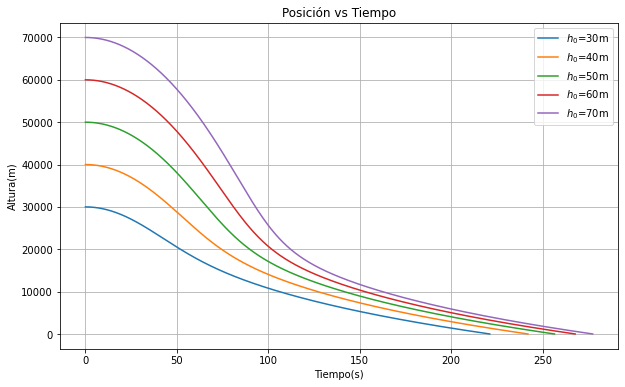

In [176]:
##Graficamos los resultados:
plt.figure(figsize=(10,6))
plt.plot(P1[1],P1[0][:,0],label=("$h_0$=30m"))
plt.plot(P2[1],P2[0][:,0],label=("$h_0$=40m"))
plt.plot(P3[1],P3[0][:,0],label=("$h_0$=50m"))
plt.plot(P4[1],P4[0][:,0],label=("$h_0$=60m"))
plt.plot(P5[1],P5[0][:,0],label=("$h_0$=70m"))
plt.title("Posición vs Tiempo")
plt.xlabel("Tiempo(s)")
plt.ylabel("Altura(m)")
plt.grid()
plt.legend()
plt.show()

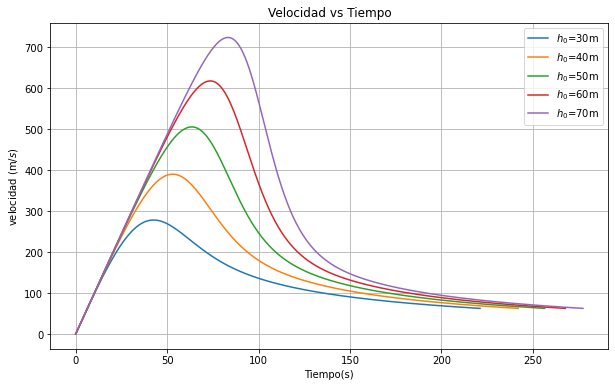

In [174]:
plt.figure(figsize=(10,6))
plt.plot(P1[1],-P1[0][:,1],label=("$h_0$=30m"))
plt.plot(P2[1],-P2[0][:,1],label=("$h_0$=40m"))
plt.plot(P3[1],-P3[0][:,1],label=("$h_0$=50m"))
plt.plot(P4[1],-P4[0][:,1],label=("$h_0$=60m"))
plt.plot(P5[1],-P5[0][:,1],label=("$h_0$=70m"))
plt.title("Velocidad vs Tiempo")
plt.xlabel("Tiempo(s)")
plt.ylabel("velocidad (m/$s$)")
plt.grid()
plt.legend()
plt.show()

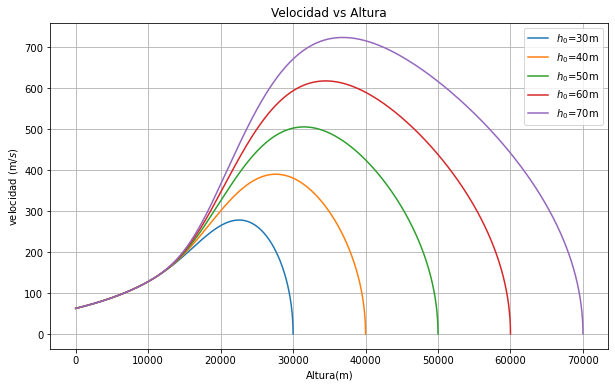

In [175]:
plt.figure(figsize=(10,6))
plt.plot(P1[0][:,0],-P1[0][:,1],label=("$h_0$=30m"))
plt.plot(P2[0][:,0],-P2[0][:,1],label=("$h_0$=40m"))
plt.plot(P3[0][:,0],-P3[0][:,1],label=("$h_0$=50m"))
plt.plot(P4[0][:,0],-P4[0][:,1],label=("$h_0$=60m"))
plt.plot(P5[0][:,0],-P5[0][:,1],label=("$h_0$=70m"))
plt.title("Velocidad vs Altura")
plt.xlabel("Altura(m)")
plt.ylabel("velocidad (m/$s$)")
plt.grid()
plt.legend()
plt.show()

## Velocidad máxima
Para hallar la velocidad máxima de cada trayectoria, simplemente pedimos al arreglo de número que tenemos para cada función, cuánto es su valor máximo:

In [182]:
##Llamamos los arreglos:
print("El valor máximo para una altura de 30km es de",max(-P1[0][:,1]),"m/s")
print("El valor máximo para una altura de 40km es de",max(-P2[0][:,1]),"m/s")
print("El valor máximo para una altura de 50km es de",max(-P3[0][:,1]),"m/s")
print("El valor máximo para una altura de 60km es de",max(-P4[0][:,1]),"m/s")
print("El valor máximo para una altura de 70km es de",max(-P5[0][:,1]),"m/s")

El valor máximo para una altura de 30km es de 278.1639984048608 m/s
El valor máximo para una altura de 40km es de 390.0075330243206 m/s
El valor máximo para una altura de 50km es de 505.4722458874412 m/s
El valor máximo para una altura de 60km es de 617.7141348274048 m/s
El valor máximo para una altura de 70km es de 723.799496196169 m/s


## Gráfica de velocidad máxima dependiendo de la altura:

Como sólamente tenemos datos numéricos, realizaremos una interpolación con splines cúbicos de los 5 casos que tenemos,
para alturas de (30km,40km,50km,60km,70km)

Para estas alturas, tenemos que las velocidades máximas son de (278.1639984048608 m/s,390.0075330243206 m/s,505.4722458874412 m/s, 617.7141348274048 m/s, 723.799496196169 m/s) respectivamente. 

Con estos datos vamos a aplicar una interpolación y estimar cuánto es la velocidad máxima dependiendo de la altura para nuestras condiciones iniciales dadas, (m=60$kg$,A=0.3 $m^2$)

In [184]:
import scipy.interpolate as spin
##Arreglos:
X=[30,40,50,60,70] ##Alturas
Y=[max(-P1[0][:,1]),max(-P2[0][:,1]),max(-P3[0][:,1]),max(-P4[0][:,1]),max(-P5[0][:,1])] ##Velocidades máximas
A=spin.CubicSpline(X,Y) ##Interpolamos:

Con nuestra interpolación hecha, solo nos resta realizar la gráfica en nuestro intervalo interpolado, ([30,70]):

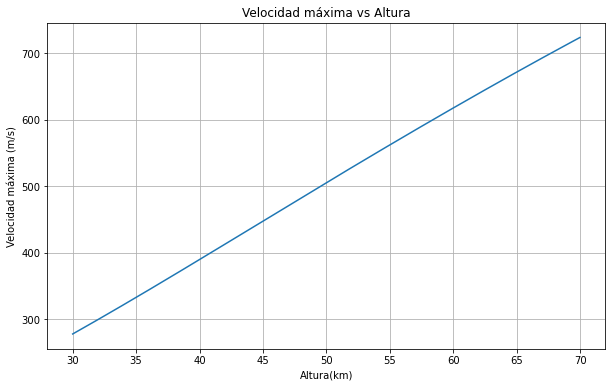

In [193]:
plt.figure(figsize=(10,6))
H=np.arange(30,70,0.01)
plt.plot(H,A(H))
plt.xlabel("Altura(km)")
plt.ylabel("Velocidad máxima (m/s)")
plt.title("Velocidad máxima vs Altura")
plt.grid()
plt.show()

Al parecer tiene un comportamiento lineal, nótese que si usamos nuestra interpolación para los puntos que dimos, nos debe dar exactamente el valor

In [194]:
print(A(30),A(40),A(50),A(60),A(70))

278.1639984048608 390.0075330243206 505.4722458874412 617.7141348274048 723.799496196169


## Muchas gracias profe :)